# Q1
Develop a Monte Carlo algorithm to estimate $\int_0^1 \int_0^1 f(x_1, x_2) dx_1 dx_2$. 
Illustrate your algorithm on $f(x_1, x_2) = x_1 + x_2$ as well as $f(x_1, x_2) = x_1x_2$. The rate of convergence with respect to the
number of evaluation, say $n$, of $f$, should be illustrated as well as the level of uncertainty.

In [1]:
import numpy as np

# Assumption: Parameter domains inside [0, 1] & 2 variables

def monte_carlo_sample(func, n=1000, seed=None):
    """
    Generate Monte Carlo samples for a given function.

    Parameters:
        func (function): The function to generate samples for.
        n (int): Number of samples to generate.
        seed (int): Seed for random number generation.

    Returns:
        numpy.ndarray: Generated samples.
    """
    rng = np.random.default_rng(seed)
    input = rng.uniform(size=(2, n))
    output = func(input)
    return output

def monte_carlo(func, n=1000, seed=None, sample=None, return_all=False):
    """
    Monte Carlo simulation for estimating the expected value of a function.

    Parameters:
        func (function): The function to be evaluated.
        n (int): Number of samples to generate.
        seed (int): Seed for random number generation.
        sample (numpy.ndarray): Pre-generated samples (optional).
        return_all (bool): If True, returns a running average for each sample.

    Returns:
        float: Estimated expected value of the function.
    """
    if sample is None:
        sample = monte_carlo_sample(func, n, seed)
    if return_all:
        return np.divide(np.cumsum(sample), np.arange(len(sample)) + 1)
    return np.mean(sample)

def confidence_interval(x, percentile=5):
    """
    Calculate the confidence interval of the input data.

    Parameters:
        x (numpy.ndarray): Input data.
        percentile (float): Desired percentile for the confidence interval.

    Returns:
        tuple: Mean and confidence interval bounds.
    """
    mean = np.mean(x, axis=0)
    percentiles = np.percentile(x, [percentile, 100 - percentile], axis=0)
    return mean, percentiles

def func1(input):  # answer = 1
    return input[0] + input[1]

def func2(input):  # answer = 0.25
    return input[0] * input[1]

def L1(pred, true):
    """
    Calculate the L1 distance (absolute difference) between predicted and true values.

    Parameters:
        pred (numpy.ndarray): Predicted values.
        true (numpy.ndarray): True values.

    Returns:
        numpy.ndarray: L1 distances.
    """
    return np.abs(pred - true)

def replicate(n, func):
    """
    Replicate a function evaluation multiple times and stack the results.

    Parameters:
        n (int): Number of replications.
        func (function): The function to replicate.

    Returns:
        numpy.ndarray: Stacked results of function evaluations.
    """
    result_list = [func() for _ in range(n)]
    result_array = np.vstack(result_list)
    return result_array

import matplotlib.pyplot as plt
def plot_convergence(error, ci=None, title=None):
    """
    Plot convergence data with confidence intervals.

    Parameters:
        error (numpy.ndarray): Convergence error data.
        ci (tuple): Confidence interval data as a tuple (mean, [lower_bound, upper_bound]).
        title (str): Title for the plot (optional).
    """    
    plt.plot(error, label='Error', color='blue', linewidth=2)

    if ci is not None:
        plt.plot(ci[0], color='red', linestyle='--', label='CI Lower Bound', linewidth=1)
        plt.plot(ci[1], color='red', linestyle='--', label='CI Upper Bound', linewidth=1)

    plt.xlabel("Number of Samples (n)")
    plt.ylabel("Error")
    
    if title is None:
        title = "Convergence Plot"
    plt.title(title)
    
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

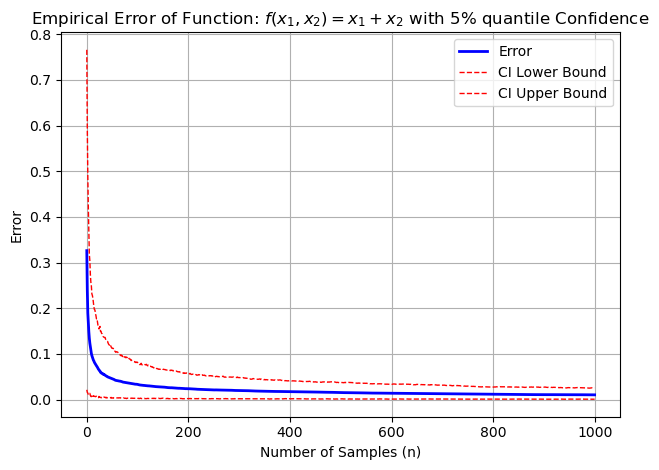

In [2]:
samples1 = replicate(1000, lambda: monte_carlo(func1, n=1000, return_all=True))
error1 = L1(samples1, 1)
mean_error1, ci_error1 = confidence_interval(error1)
plot_convergence(mean_error1, ci_error1, title=r"Empirical Error of Function: $f(x_1, x_2) = x_1 + x_2$ with 5% quantile Confidence")

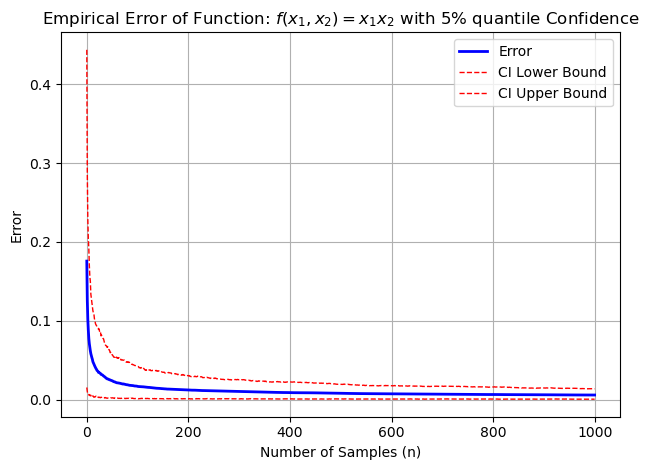

In [3]:
samples2 = replicate(1000, lambda: monte_carlo(func2, n=1000, return_all=True))
error2 = L1(samples2, .25)
mean_error2, ci_error2 = confidence_interval(error2)
plot_convergence(mean_error2, ci_error2, r"Empirical Error of Function: $f(x_1, x_2) = x_1 x_2$ with 5% quantile Confidence")

# Q2
Generate 1000 independent Gaussian vectors $(Xi)_{i=1,...,1000}$, each having dimension $p = 400$, mean
0 and covariance the identity matrix. Give an estimate of the covariance matrix as well as a plot
of the associated eigenvalues.

In [4]:
def normal_sample(n=1000, params=None, seed=None):
    """
    Generate a sample from a multivariate normal distribution.

    Parameters:
        n (int): Sample size.
        params (dict): Parameters for the distribution (default is None).
        seed (int): Seed for random number generation (default is None).

    Returns:
        numpy.ndarray: Generated sample.
    """
    if params is None:
        params = create_params()
    rng = np.random.default_rng(seed)
    sample = rng.multivariate_normal(params["mu"], params["sigma"], n)
    return sample

def create_params(p=400):
    """
    Create default parameters for a multivariate normal distribution.

    Parameters:
        p (int): Dimension of the distribution (default is 400).

    Returns:
        dict: Dictionary containing mean (mu) and covariance matrix (sigma).
    """
    mu = np.zeros(p)
    sigma = np.identity(p)
    return {"mu": mu, "sigma": sigma}

# Generate a sample
sample = normal_sample()

# Estimate the covariance matrix
cov = np.cov(sample, rowvar=False)

cov[:3, :3]


array([[ 1.01648658,  0.02011894,  0.02836885],
       [ 0.02011894,  0.98132867, -0.01220411],
       [ 0.02836885, -0.01220411,  1.06357638]])

<div style="color:orange">
Here is a slice of the estimated covariance. It shows that the estimated covariance relatively close to the actual covariance. I leave out the full covariance for simplicity, but it can be shown that the full estimated covariance quite similar to the actual covariance.
</div>

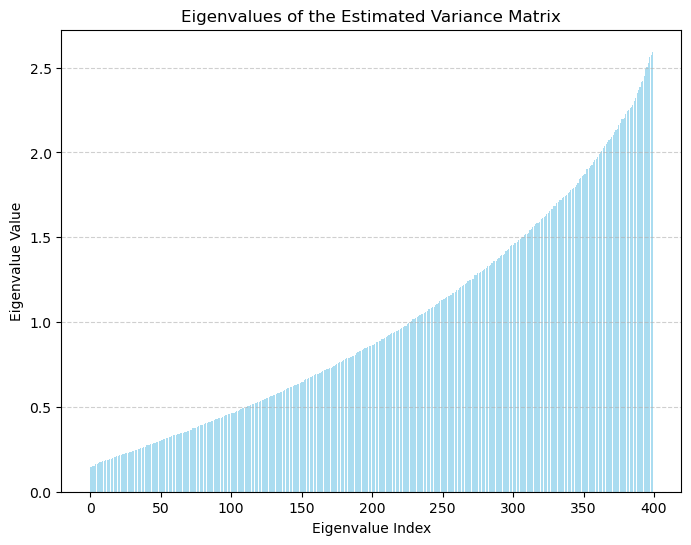

In [5]:
import matplotlib.pyplot as plt

def plot_eigvals(eigenvalues):
    """
    Plot the eigenvalues of a matrix in ascending order.

    Parameters:
        eigenvalues (numpy.ndarray): Array of eigenvalues to be plotted.

    Returns:
        None
    """
    sorted_eigenvalues = np.sort(eigenvalues)

    # Create a bar plot of the sorted eigenvalues with a horizontal grid
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(sorted_eigenvalues)), sorted_eigenvalues, color='skyblue', alpha=0.7)

    # Label the axes and add a title
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Eigenvalue Value')
    plt.title('Eigenvalues of the Estimated Variance Matrix')

    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Show the plot
    plt.show()

# Calculate the eigenvalues of the covariance matrix
eigvals = np.linalg.eigvalsh(cov)

# Plot the eigenvalues
plot_eigvals(eigvals)


# Q3
Using the covariates generated previously, generate a multi-task classification dataset with 3 labels:
$1, 2, 3$ such that for each $i = 1, . . . , 1000$, 
$$P(Y_i = 1) = \exp(X_i^T \beta_1)/(1+\exp(X_i^T \beta_1)+\exp(X_i^T \beta_2))$$ 
and 
$$P(Y_i = 2) = \exp(X_i^T \beta_2)/(1+\exp(X_i^T \beta_1)+\exp(X_i^T \beta_2))$$
with $\beta_1 = (1, 0, . . . , 0), \beta_2 = (0, 1, 0, . . . , 0)$.
Note that $P(Yi = 3)$ is given by $1 − P(Yi = 1) − P(Yi = 2)$.

<div style="color:orange">

The probability of observing $Y_i$ given that it belongs to class $j$ for $j \in 1, 2$ is given by: 

$$p_{ij} := P(Y_i = j) = \frac{\exp{(X_i^T \beta_j)}} {1 + \sum_{j=1}^2 \exp{(X_i^T \beta_j)}}, \text{ and } p_{i3} := P(Y_i = 3) = \frac{1} {1 + \sum_{j=1}^2 \exp{(X_i^T \beta_j)}}.$$

Alternatively, by defining $\beta_3$ to equal a zero vector, we can write that for $j \in 1, 2, 3$:

$$p_{ij} := P(Y_i = j) = \frac{\exp{(X_i^T \beta_j)}} {\sum_{j=1}^3 \exp{(X_i^T \beta_j)}}$$
</div>

In [6]:
# Define the number of classes
n_classes = 3

# Initialize beta matrix with zeros
beta = np.zeros((n_classes - 1, len(cov)))

# Set values in the beta matrix for the first two classes
beta[0, 0] = 1
beta[1, 1] = 1

def probabilities(X, beta, identified=True):
    """
    Calculate class probabilities based on input data and beta matrix.

    Parameters:
        X (numpy.ndarray): Input data, where each row represents a sample.
        beta (numpy.ndarray): Beta matrix specifying class weights.

    Returns:
        numpy.ndarray: Probability matrix, where each row corresponds to a sample,
                       and each column corresponds to a class.
    """
    # Ensure X is a 2D array
    if X.ndim == 1:
        X = X[np.newaxis, :]

    # Add an additional row of zeros to beta for the last class
    if identified:
        beta = np.vstack((beta, np.zeros((1, beta.shape[1]))))

    # Calculate the weights using the product of X and beta transposed
    weights = np.exp(X @ beta.T)

    # Normalize the weights to obtain probabilities for each class
    probabilities = weights / np.sum(weights, axis=1)[:, np.newaxis]

    return probabilities

def multinomial_logistic_sample(beta, covariates, n=1, seed=None):
    """
    Generate multinomial logistic samples based on probabilities.

    Parameters:
        beta (numpy.ndarray): Coefficient matrix specifying class weights.
        covariates (numpy.ndarray): Input data, where each row represents a sample.
        n (int): Number of samples to generate (default is 1).
        seed (int): Seed for random number generation (default is None).

    Returns:
        numpy.ndarray: Multinomial logistic samples.
    """
    rng = np.random.default_rng(seed)
    pvals = probabilities(covariates, beta)
    sample = rng.multinomial(n, pvals)

    return sample

# Generate multinomial logistic samples based on beta and sample data
y = multinomial_logistic_sample(beta, sample)
y.shape



(1000, 3)

# Q4
Write the risk function following from the MLE as well as its gradient.

<div style="color:orange">
Assuming that observations are i.i.d., the log-likelihood function is given by: 

$$\begin{align*}
\log{P(Y)} & = \log{\prod_{i=1}^{1000}P(Y_i)}\\
           & = \log{\prod_{i=1}^{1000} \prod_{j=1}^3 p_{ij}^{\mathbb{1}\{Y_i=j\}}} \\
           & = \sum_{i=1}^{1000} \sum_{j=1}^3 \mathbb{1}\{Y_i=j\} \log{p_{ij}}.
\end{align*}$$

Thus, the risk function following from the MLE equals:
$$R(\beta) = - \frac{1}{n} \sum_{i=1}^{1000} \sum_{j=1}^3 \mathbb{1}\{Y_i=j\} \log{p_{ij}}$$

Furthermore, the derivative of each observation with respect to $\beta_j$ and $\beta_k$ for $k \neq j$ are: 
$$\frac{\partial}{\partial \beta_j}\log{p_{ij}} = \frac{1}{p_{ij}} \frac{\partial}{\partial \beta_j} p_{ij} = \frac{p_{ij}(1-p_{ij})X_i^T}{p_{ij}} = (1 - p_{ij})X_i^T \text{, and}$$ 
$$\frac{\partial}{\partial \beta_k}\log{p_{ij}} = \frac{1}{p_{ij}} \frac{\partial}{\partial \beta_k} p_{ij} = -\frac{p_{ij}p_{ik}X_i^T}{p_{ij}} = - p_{ik}X_i^T,$$
respectively. Combining these together gives the derivative with respect to $\beta_k$ for any $k$:
$$\frac{\partial}{\partial \beta_k}\log{p_{ij}} = \frac{1}{p_{ij}} \frac{\partial}{\partial \beta_k} p_{ij} = \frac{p_{ij}(\mathbb{1}\{k=j\}-p_{ij})X_i^T}{p_{ij}} = (\mathbb{1}\{k=j\} - p_{ik})X_i^T.$$

Taking this together, the gradient of the risk function becomes:
$$\begin{align*}
\frac{\partial}{\partial \beta_k} R(\beta) & = - \frac{1}{n} \sum_{i=1}^{1000} \sum_{j=1}^3 \mathbb{1}\{Y_i=j\} \frac{\partial}{\partial \beta_k} \log{p_{ij}} \\
                          & = - \frac{1}{n} \sum_{i=1}^{1000} \sum_{j=1}^3 \mathbb{1}\{Y_i=j\} (\mathbb{1}\{k=j\} - p_{ik})X_i^T \\
                          & = - \frac{1}{n} \sum_{i=1}^{1000} (\mathbb{1}\{Y_i=k\} - p_{ik}) X_i^T.
\end{align*}$$
</div>

# Q5
(no package here apart from the basics like numpy) Write a program to compute the gradient at a
given point (which would be an input of the program)

In [7]:
def gradient(beta, covariates, target):
    """
    Calculate the gradient of the likelihood function.

    Parameters:
        beta (numpy.ndarray): Coefficient matrix specifying class weights.
        covariates (numpy.ndarray): Input data, where each row represents a sample.
        target (numpy.ndarray): Target values (multinomial logistic samples).

    Returns:
        numpy.ndarray: Gradient vector.
    """
    prob = probabilities(covariates, beta)
    error = target - prob

    # Filter out the error for the last class as it's not needed for the gradient
    filtered_error = error[:, :-1]

    full_grad = filtered_error[..., np.newaxis] @ covariates[:, np.newaxis]
    grad = -np.mean(full_grad, axis=0)
    return grad

# Calculate the gradient using the specified beta, sample data, and target values
grad = gradient(beta, sample, y)

grad.shape

(2, 400)

# Q6
(no package here apart from the basics like numpy) Write a program to compute stochastic version
of the gradient at a given point (which would be an input of the program)

(NEW) Explain carefully how you generate the stochastic gradient before giving the program.

<div style="color:orange">

To compute the stochastic gradient, a random subset of your dataset is used. The stochastic gradient is essentially an estimate of the true gradient based on this random subset. Here are the steps: 
1. Uniformly randomly sample the data. 
2. Compute the gradient on the subset. 

This gives a computationally quick approximation of the gradient using the Monte Carlo property.
</div>

In [8]:
def mc_stochastic_gradient(beta, covariates, target, n_samples=10, seed=None):
    """
    Compute the Monte Carlo stochastic gradient of the likelihood function.

    Parameters:
        beta (numpy.ndarray): Coefficient matrix specifying class weights.
        covariates (numpy.ndarray): Input data, where each row represents a sample.
        target (numpy.ndarray): Target values (multinomial logistic samples).
        n_samples (int): Number of samples to use for stochastic gradient computation (default is 10).
        seed (int): Seed for random number generation (default is None).

    Returns:
        numpy.ndarray: Stochastic gradient vector.
    """
    rng = np.random.default_rng(seed)
    indices = rng.choice(len(covariates), n_samples)
    grad = gradient(beta, covariates[indices], target[indices])
    return grad

s_grad = mc_stochastic_gradient(beta, sample, y, 1000)
s_grad.shape

(2, 400)

# Q7
(no package here apart from the basics like numpy) Write a program to evaluate the performance
of a given set of vectors $(\beta_1, \beta_2, \beta_3)$ on the previous problem.

(NEW) Explain carefully the idea you follow to evaluate the performance and why this is reliable.

<div style="color:orange">

To evaluate performance, I use the negative log-likelihood (NLL) as the performance metric. NLL quantifies how well the predicted probabilities align with the actual outcomes.
I use it NLL for multiple stages:
1. Training Set: Use for updating to the optimal parameters.
2. Validation Set: Detect overfitting and perform early stopping.
3. Test Set: Provide an unbiased evaluation on unseen data.

Using NLL for both training and evaluation ensures that the optimization and evaluation are consistently juded. By separating our data into training, validation, and test sets, I avoid overfitting and obtain a reliable estimate of the model's performance on new data. A disadvantage of using the NLL at the end could be that the value less intuitive.
</div>

In [9]:
def risk_MLE(beta, covariates, target, identified=True):
    """
    Calculate the maximum likelihood estimation (MLE) risk.

    Parameters:
        beta (numpy.ndarray): Coefficient matrix specifying class weights.
        covariates (numpy.ndarray): Input data, where each row represents a sample.
        target (numpy.ndarray): Target values (multinomial logistic samples).

    Returns:
        float: MLE risk value.
    """
    prob = probabilities(covariates, beta, identified)
    logprob = np.log(prob)
    filtered_prob = logprob * target
    risk = -np.mean(np.sum(filtered_prob, axis=1))
    return risk

risk_MLE(beta, sample, y)

0.9477820636307549

# Q8
(no package here apart from the basics like numpy) Run GD and SGD for initial vector (0, . . . , 0)
and different step sizes and compare them based on the program developed before.

In [10]:
from sklearn.model_selection import train_test_split
validation_fraction = 0.3
num_samples = len(sample)
num_validation_samples = int(num_samples * validation_fraction)

# Split the data into training and test sets
covariates_train, covariates_test, target_train, target_test = train_test_split(
    sample, y, test_size=num_validation_samples, random_state=0
)

In [11]:
def sgd(covariates, target, alpha=0.0001, beta=None, mc_samples=None, max_iter=1_000, eps=1e-3, seed=None, verbose=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5):
    """
    Perform Stochastic Gradient Descent (SGD) for maximum likelihood estimation (MLE).

    Parameters:
        covariates (numpy.ndarray): Input data, where each row represents a sample.
        target (numpy.ndarray): Target values (multinomial logistic samples).
        alpha (float): Learning rate (default is 0.0001).
        beta (numpy.ndarray): Coefficient matrix specifying class weights (default is None).
        mc_samples (int): Number of Monte Carlo samples for stochastic gradient (default is None). 
                          If the number is not specified, it will calculate the full gradient.
        max_iter (int): Maximum number of iterations (default is 1000).
        eps (float): Convergence threshold (default is 0.001).
        seed (int): Seed for random number generation (default is None).
        verbose (int): Verbosity level (0: no print, 1: print summary, 2: print every 50 iterations).
        early_stopping (bool): Enable early stopping (default is False).
        validation_fraction (float): Fraction of data to use for validation if early stopping is enabled (default is 0.1).
        n_iter_no_change (int): Number of iterations with no improvement to trigger early stopping (default is 5).

    Returns:
        numpy.ndarray: Updated coefficient matrix.
    """
    # Initialize beta if not provided
    if beta is None:
        beta = np.zeros((target.shape[1] - 1, covariates.shape[1]))

    if early_stopping:
        iter_no_change = 0
        # Determine the number of samples to use for validation
        num_samples = len(covariates)
        num_validation_samples = int(num_samples * validation_fraction)

        # Split the data into training and validation sets
        covariates_train, covariates_val, target_train, target_val = train_test_split(
            covariates, target, test_size=num_validation_samples, random_state=seed
        )
    else:
        covariates_train, target_train = covariates_val, target_val = covariates, target

    # Choose the gradient function based on mc_samples
    if mc_samples is None:
        grad = lambda beta: gradient(beta, covariates_train, target_train)
    else:
        grad = lambda beta: mc_stochastic_gradient(beta, covariates_train, target_train, n_samples=mc_samples, seed=seed)

    best_beta = beta
    best_risk = risk_MLE(beta, covariates_val, target_val)
    

    # Perform SGD iterations
    for iter in range(max_iter):
        beta = beta - alpha * grad(beta)
        risk = risk_MLE(beta, covariates_val, target_val)

        if verbose == 1:
            print(f"Iteration {iter+1}: Risk Score={risk}, Best Risk Score={best_risk}")

        if verbose == 2 and (iter+1) % 50 == 0:
            print(f"Iteration {iter+1}: Risk Score={risk}, Best Risk Score={best_risk}")


        if early_stopping:
            # Check for convergence based on the specified threshold
            if risk > best_risk - eps:
                iter_no_change += 1
                if iter_no_change >= n_iter_no_change:
                    break
            else:
                iter_no_change = 0
        
        if risk < best_risk:
            best_risk = risk
            best_beta = beta
            
    if verbose > 0:
        print(f"Iteration {iter+1}: Best Risk Score={best_risk} (does not account for last iteration)")
    return best_beta

In [12]:
beta_gd = sgd(covariates_train, target_train, alpha=0.1, max_iter=10_000, early_stopping=True, verbose=1)
import pandas as pd
pd.DataFrame(beta_gd)

Iteration 1: Risk Score=1.0957114928288434, Best Risk Score=1.0986122886681096
Iteration 2: Risk Score=1.094180447865326, Best Risk Score=1.0957114928288434
Iteration 3: Risk Score=1.09380019372719, Best Risk Score=1.094180447865326
Iteration 4: Risk Score=1.0943840135091298, Best Risk Score=1.09380019372719
Iteration 5: Risk Score=1.0957746428353514, Best Risk Score=1.09380019372719
Iteration 6: Risk Score=1.0978406906983722, Best Risk Score=1.09380019372719
Iteration 7: Risk Score=1.1004728973629225, Best Risk Score=1.09380019372719
Iteration 7: Best Risk Score=1.09380019372719 (does not account for last iteration)


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.057717,-0.019429,-0.001991,0.003506,-0.007899,0.003556,-0.010550,-0.006347,0.005334,-0.003831,...,0.000505,0.003481,0.009155,0.004276,-0.002101,-0.002216,-0.006432,-0.006029,0.001489,0.013467
1,-0.025322,0.050768,0.006006,-0.003911,0.010195,0.002085,0.002592,0.010729,0.006755,-0.007152,...,-0.002538,-0.001659,-0.003422,0.005365,0.001230,0.002318,0.012183,0.005090,0.005200,-0.001128


In [13]:
beta_sgd = sgd(covariates_train, target_train, alpha=0.01, max_iter=10_000, mc_samples=10, early_stopping=True, verbose=1)
pd.DataFrame(beta_sgd)

Iteration 1: Risk Score=1.1010719160664126, Best Risk Score=1.0986122886681096
Iteration 2: Risk Score=1.0985686238298775, Best Risk Score=1.0986122886681096
Iteration 3: Risk Score=1.098754741751332, Best Risk Score=1.0985686238298775
Iteration 4: Risk Score=1.0941822973359194, Best Risk Score=1.0985686238298775
Iteration 5: Risk Score=1.087897288302573, Best Risk Score=1.0941822973359194
Iteration 6: Risk Score=1.0807374139660493, Best Risk Score=1.087897288302573
Iteration 7: Risk Score=1.0850832479800125, Best Risk Score=1.0807374139660493
Iteration 8: Risk Score=1.0840552954603468, Best Risk Score=1.0807374139660493
Iteration 9: Risk Score=1.0816693756937297, Best Risk Score=1.0807374139660493
Iteration 10: Risk Score=1.0788186979983188, Best Risk Score=1.0807374139660493
Iteration 11: Risk Score=1.0752312704172116, Best Risk Score=1.0788186979983188
Iteration 12: Risk Score=1.0770623717331564, Best Risk Score=1.0752312704172116
Iteration 13: Risk Score=1.073629406924765, Best Ris

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.050669,-0.021120,0.007816,-0.001961,-0.008420,0.011513,-0.007000,-0.002317,-0.000432,-0.001456,...,0.007247,-0.006878,0.013331,0.003107,-0.016711,0.018999,-0.022438,-0.010094,-0.007699,0.006933
1,-0.026111,0.050292,-0.002655,0.002240,0.008504,-0.000712,0.010973,0.016244,0.008085,0.004363,...,-0.013836,-0.005570,-0.008947,0.004774,0.007508,-0.008236,0.016945,-0.003527,0.005635,0.003513


<div style="color:orange">

We compare the methods. An okay baseline method is the randomized prediction. Meaning that the probabilities are equal to each other. This is possible when $\beta$ equals a zero vector. Furthermore, to make sure we do not overfit we generate another sample to calculate the risk.
</div>

In [14]:
beta0 = np.zeros((y.shape[1] - 1, sample.shape[1]))


In [15]:
print(f"Risk value for randomized model:    {risk_MLE(beta0, covariates_test, target_test)}")
print(f"Risk value for real beta:           {risk_MLE(beta, covariates_test, target_test)}")
print(f"Risk value for full gradient:       {risk_MLE(beta_gd, covariates_test, target_test)}")
print(f"Risk value for stochastic gradient: {risk_MLE(beta_sgd, covariates_test, target_test)}")


Risk value for randomized model:    1.0986122886681096
Risk value for real beta:           0.9542237678784787
Risk value for full gradient:       1.083587396034233
Risk value for stochastic gradient: 1.0906234026551385


<div style="color:orange">
Gradient Descent and Stochastic Gradient Descent for multiple step sizes:
</div>

In [16]:
import numpy as np
import pandas as pd

# Define a lis0.1, 0.05, 0.01, 0.005t of step sizes to test
step_sizes = [1, 0.5, 0.1, 0.05, 0.01, 0.005]

results = []

risk_beta0 = risk_MLE(beta0, covariates_test, target_test)
risk_beta = risk_MLE(beta, covariates_test, target_test)

for alpha in step_sizes:
    beta_gd = sgd(covariates_train, target_train, alpha=alpha, max_iter=10_000, early_stopping=True)
    beta_sgd = sgd(covariates_train, target_train, alpha=alpha, max_iter=10_000, mc_samples=10, early_stopping=True)
    
    risk_gd = risk_MLE(beta_gd, covariates_test, target_test)
    risk_sgd = risk_MLE(beta_sgd, covariates_test, target_test)
    
    results.append({
        'step_size': alpha,
        'actual_beta': risk_beta,
        'risk_gd': risk_gd,
        'risk_sgd': risk_sgd,
        'risk_random_chance': risk_beta0
    })


pd.DataFrame(results)


,step_size,actual_beta,risk_gd,risk_sgd,risk_random_chance
0,1.000,0.954224,1.088444,1.098612,1.098612
1,0.500,0.954224,1.078724,1.098612,1.098612
2,0.100,0.954224,1.077329,1.098612,1.098612
3,0.050,0.954224,1.071898,1.120786,1.098612
4,0.010,0.954224,1.096186,1.102187,1.098612
5,0.005,0.954224,1.097375,1.093681,1.098612


# Q9
Using scikitlearn, compute directly the estimate using $\mathcal{l}_1$ penalization. And compare to your
approach.

<div style="color:orange">
Note this alpha is different from the one before. This alpha is the penalization term. Not the learning rate. The learning rate is computed is some specialized method, which seems to not work well using the method we implement.
</div>

In [17]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
}

clf = SGDClassifier(loss="log_loss", penalty="l1", fit_intercept=False, max_iter=10_000, early_stopping=True)

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='neg_log_loss') 
grid_search.fit(sample, np.argmax(y, axis=1))

best_clf = grid_search.best_estimator_
best_clf.fit(sample, np.argmax(y, axis=1))

beta_sgd_l1 = best_clf.coef_

print("Best Hyperparameters: ", grid_search.best_params_)
print("Test Risk: ", risk_MLE(beta_sgd_l1, covariates_test, target_test, identified=False))
print("Coefficient matrix (beta_sgd_l1):")
warnings.filterwarnings("default")
pd.DataFrame(beta_sgd_l1)

Best Hyperparameters:  {'alpha': 0.1}
Test Risk:  1.0137442707270254
Coefficient matrix (beta_sgd_l1):


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.358352,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.025495,0.247825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In this case, the L1 regularized method seems to be performing better looking at the Risk Scores. However, this might not be necessarily be the case for all datasets. Here, we specifically set $\beta$ to a zero matrix except for two spaces. Therefore, it is logical that L1 regularization makes this perform better.

# Q10
Import the **wine** database from https://archive.ics.uci.edu/dataset/109/wine and apply
your method to the given data. Is a particular feature more relevant than the other?

In [18]:
attributes = [
	"Alcohol",
 	"Malic acid",
 	"Ash",
	"Alcalinity of ash",
 	"Magnesium",
	"Total phenols",
 	"Flavanoids",
 	"Nonflavanoid phenols",
 	"Proanthocyanins",
	"Color intensity",
 	"Hue",
 	"OD280/OD315 of diluted wines",
 	"Proline"
]   

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
wine = np.loadtxt("wine.data", delimiter=",")
wine_y, wine_x = np.split(wine, [1], 1)
enc.fit(wine_y)
wine_y = enc.transform(wine_y).toarray()

validation_fraction = 0.2
num_samples = len(wine_x)
num_validation_samples = int(num_samples * validation_fraction)
wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(
    wine_x, wine_y, test_size=num_validation_samples, random_state=0
)

from sklearn.preprocessing import StandardScaler

# Standardizing, mainly to avoid numerical instability
scaler = StandardScaler()
scaler.fit(wine_x_train)
wine_x_train_scaled = scaler.transform(wine_x_train)
wine_x_test_scaled = scaler.transform(wine_x_test)


wine_x_train_scaled.shape, wine_y_train.shape, wine_x_test_scaled.shape, wine_y_test.shape


((143, 13), (143, 3), (35, 13), (35, 3))

<div style="color:orange">
I experiment with multiple step sizes to get a sense of their influence on the model's performance. However, it is not intended to be a rigorous or definitive approach. My main conclusions will be grounded in the L1 regularization approach using Scikit Learn
</div>

In [20]:
results_wine = []

for alpha in step_sizes:
    beta_wine_sgd = sgd(wine_x_train_scaled, wine_y_train, max_iter=10_000, alpha=0.01, mc_samples=10, early_stopping=True)
    beta_wine_gd = sgd(wine_x_train_scaled, wine_y_train, max_iter=10_000, alpha=0.01, early_stopping=True)

    
    # Compute performance for GD and SGD
    risk_wine_gd = risk_MLE(beta_wine_sgd, wine_x_test_scaled, wine_y_test)
    risk_wine_sgd = risk_MLE(beta_wine_gd, wine_x_test_scaled, wine_y_test)
    
    results_wine.append({
        'step_size': alpha,
        'risk_wine_gd': risk_wine_gd,
        'risk_wine_sgd': risk_wine_sgd,
    })


pd.DataFrame(results_wine)

,step_size,risk_wine_gd,risk_wine_sgd
0,1.000,0.348241,0.347452
1,0.500,0.325574,0.336917
2,0.100,0.347091,0.353168
3,0.050,0.349664,0.342162
4,0.010,0.349044,0.344270
5,0.005,0.336030,0.350801


In [21]:
warnings.filterwarnings("ignore")
clf = SGDClassifier(loss="log_loss", penalty="l1", fit_intercept=False, max_iter=10_000, early_stopping=True, verbose=0)
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='neg_log_loss')
grid_search.fit(wine_x_train_scaled, np.argmax(wine_y_train, axis=1))
best_clf = grid_search.best_estimator_

# Fit the best classifier to the data
best_clf.fit(wine_x_train_scaled, np.argmax(wine_y_train, axis=1))
beta_sgd_l1 = best_clf.coef_

print("Best Hyperparameters: ", grid_search.best_params_)
print("Test Risk: ", risk_MLE(beta_sgd_l1, wine_x_test_scaled, wine_y_test, identified=False))
print("Coefficient matrix (beta_sgd_l1):")
warnings.filterwarnings("default")
pd.DataFrame(beta_sgd_l1, columns=attributes)

Best Hyperparameters:  {'alpha': 0.01}
Test Risk:  0.05341089408376848
Coefficient matrix (beta_sgd_l1):


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,2.076764,0.192625,0.459714,-1.856650,-0.397477,0.000000,1.455048,0.0,0.000000,0.000000,-0.263501,1.474863,3.456039
1,-2.577181,0.000000,-1.507822,0.192009,0.000000,0.686164,0.000000,0.0,2.283104,-5.220152,1.357662,0.000000,-4.273154
2,0.000000,0.917442,0.335034,0.000000,0.000000,0.000000,-3.449922,0.0,0.000000,4.605199,-0.464873,-0.751241,0.000000


In [22]:
indices = L1(beta_sgd_l1, 0) > 1e-4

selected_rows = [np.array(attributes)[mask] for mask in indices]
selected_rows

count = np.sum(indices, axis=0)

<div style="color:orange">
These variables are important for the classification
</div>

In [23]:
np.array(attributes)[count > 0]

array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Proanthocyanins',
       'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
       'Proline'], dtype='<U28')

<div style="color:orange">
These variables are only important for 1 class, in the sense of one vs the rest. The distribution of the rest is equal when the covariate changes in value.
</div>

In [24]:
np.array(attributes)[count == 1]

array(['Magnesium', 'Total phenols', 'Proanthocyanins'], dtype='<U28')

<div style="color:orange">
Thus, the important variables that explain the variability are the coefficients that differ from zero.
</div>